# Курсовая работа № 2
## Аналитика. Начальный уровень




Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.


In [23]:
import psycopg2
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
plt.style.use('seaborn-darkgrid')
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()


### Узнаем сколько всего сотрудников в датасете.

In [3]:
count_employee = pd.read_sql_query('''SELECT COUNT (DISTINCT "Employee Number") FROM hr_dataset''',conn)
count_employee

,count
0,309


### Посмотрим на кол-во сотрудиков на каждой позиции

In [4]:
employee_position = pd.read_sql_query('''SELECT position,COUNT(position) as count_position
                                        FROM hr_dataset
                                        GROUP BY position
                                        ORDER BY COUNT(position) DESC''',conn)
employee_position

,position,count_position
0,Production Technician I,136
1,Production Technician II,57
2,Area Sales Manager,27
3,Production Manager,14
4,Database Administrator,13
5,Software Engineer,9
6,Network Engineer,9
7,Sr. Network Engineer,5
8,IT Support,4
9,Sr. DBA,4


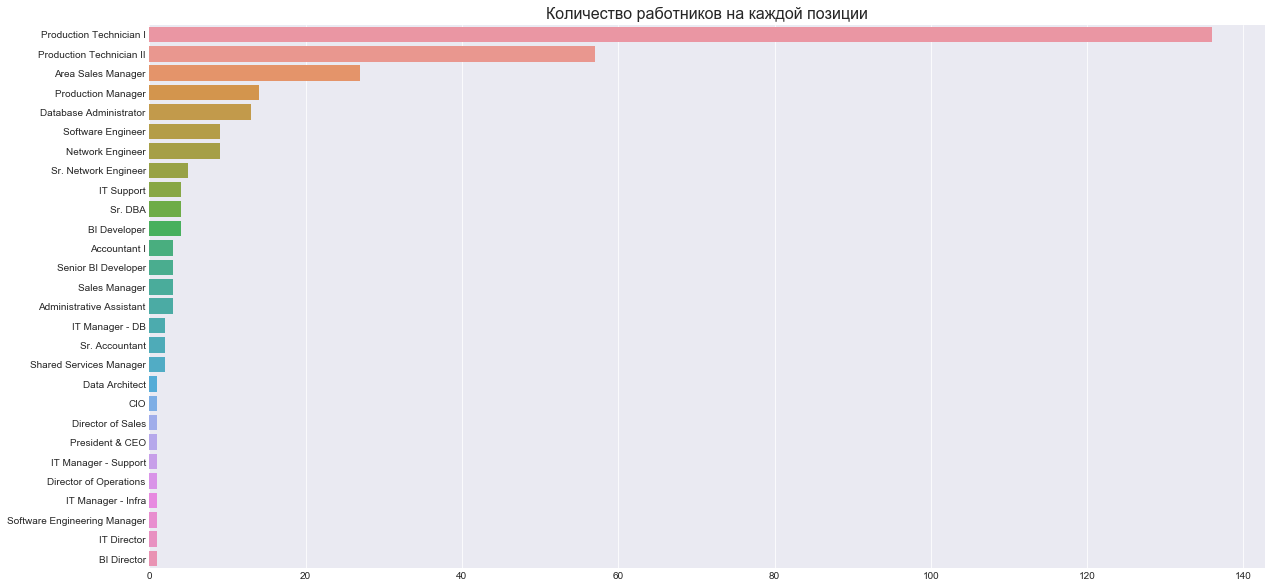

In [32]:

plt.figure(figsize=(20,10))
sns.barplot(y = employee_position.position, x = employee_position.count_position)
plt.title("Количество работников на каждой позиции", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Посмотрим на кол-во сотрудиков на каждой позиции,которые были найдены за ресурсы компании

In [6]:
employee_position_from_recruiting = pd.read_sql_query('''SELECT position,COUNT(position) as count_position_from_recruiting
                                                         FROM hr_dataset
                JOIN recruiting_costs ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
                                                         WHERE "Total" > 0
                                                         GROUP BY position
                                                         ORDER BY count_position_from_recruiting DESC''',conn)
employee_position_from_recruiting

,position,count_position_from_recruiting
0,Production Technician I,109
1,Production Technician II,39
2,Area Sales Manager,24
3,Software Engineer,8
4,Production Manager,8
5,Administrative Assistant,3
6,Sales Manager,3
7,Database Administrator,3
8,Accountant I,2
9,IT Manager - DB,2


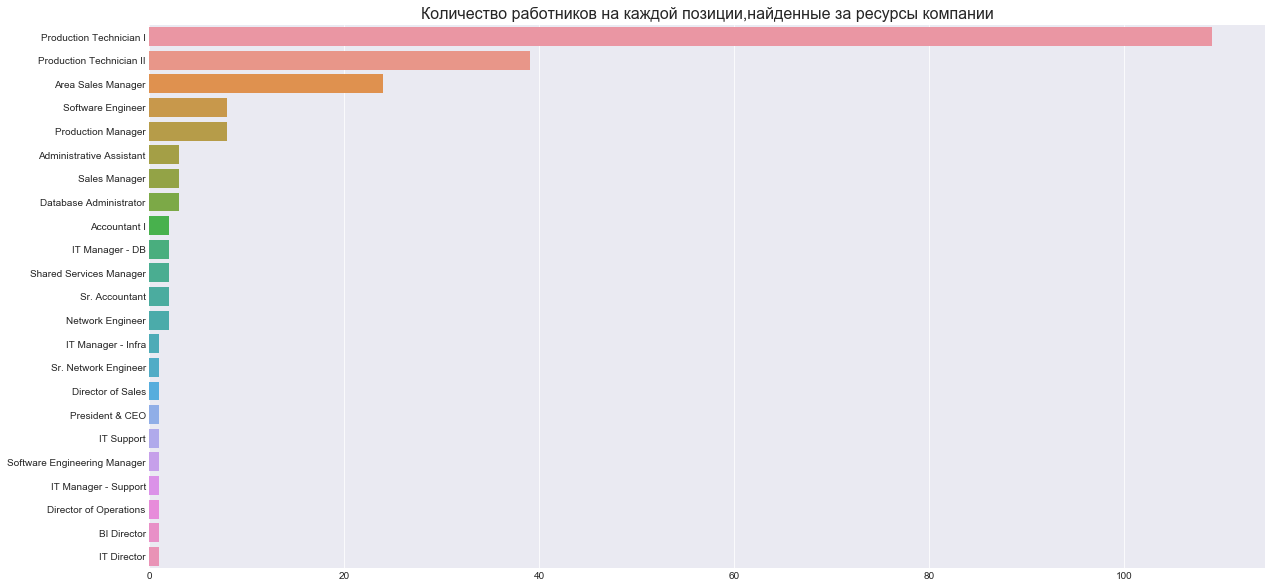

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(y = employee_position_from_recruiting.position, x = employee_position_from_recruiting.count_position_from_recruiting)
plt.title("Количество работников на каждой позиции,найденные за ресурсы компании", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Посчитаем процент сотрудников на рекрут которых компания не пришлось тратить ресурсы.Где 100 - все сотрудники найдены не за ресурсы компании
***

In [8]:
employee_position_percent_from_recruiting = pd.read_sql_query(
'''SELECT position,COUNT(position) as count_position, 100*(ROUND((COUNT(position) - a.count_position_from_recruiting)/ROUND(COUNT(position),3),2)) as percent_free
   FROM hr_dataset
   LEFT JOIN (SELECT position,COUNT(position) as count_position_from_recruiting
         FROM hr_dataset
         JOIN recruiting_costs ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
         WHERE "Total" > 0
         GROUP BY position)as a USING (position)
   GROUP BY position,a.count_position_from_recruiting
   ORDER BY percent_free ''',conn)
employee_position_percent_from_recruiting.fillna(100)

,position,count_position,percent_free
0,President & CEO,1,0.0
1,BI Director,1,0.0
2,Sr. Accountant,2,0.0
3,Sales Manager,3,0.0
4,Director of Operations,1,0.0
5,IT Manager - DB,2,0.0
6,IT Manager - Support,1,0.0
7,IT Director,1,0.0
8,Director of Sales,1,0.0
9,Software Engineering Manager,1,0.0


*******
* # Задача 1
## Для оптимизации затрат мы проанализируем источники рекрутинга персонала,на позициях ,штат  которых более чем на половину состоит из сотрудников ,найденных за ресурсы компании (Исключая руководящие должности из-за уникальности поиска сотрудников)
***

***
## Соберем таблицу с процентом кол-ва  работающего на данный момент персонала от общего кол-ва нанятых сотрудников для каждой позиции(где 100 означает : Штат сотрудников не менялся) 


In [9]:
percent_active = pd.read_sql_query(
'''SELECT position,COUNT(position) as count_position,  (100 - 100*(ROUND((COUNT(position) - a.count_active_employee)/ROUND(COUNT(position),3),2))) as percent_active
FROM hr_dataset
JOIN (SELECT position,COUNT(position) as count_active_employee
		FROM hr_dataset
		WHERE "Employment Status" = 'Active'
		GROUP BY position
		 )as a USING (position)
GROUP BY position,a.count_active_employee
ORDER BY percent_active ''',conn)
percent_active

,position,count_position,percent_active
0,Sr. Network Engineer,5,40.0
1,Production Technician II,57,40.0
2,Shared Services Manager,2,50.0
3,IT Manager - DB,2,50.0
4,Production Technician I,136,54.0
5,Database Administrator,13,54.0
6,Production Manager,14,64.0
7,Sales Manager,3,67.0
8,Administrative Assistant,3,67.0
9,Software Engineer,9,67.0


* #  Задача 2
###  Здесь мы видим позиции с большой текучкой кадров,необходимо рассмотреть её причины
***

***
* #  Задача 3
**Посмотрим на текщий штат сотрудников.Узнаем сколько сотрудников состоит в браке,а сколько холостых для каждой расовой группы сотрудников .**
***

# -----------------------------------------------------------------------------------------------------------------

* #  Задача 1

**Соберем таблицу с ценой за каждого сотрудника `pay_one_employee` и кол-во новых сотрудников `count_people` с помощью каждого источника `Employee Source` и для каждой позиции `position`**. `pay_one_employee` = "Total"/ на кол-во сотрудников для каждого "Employee Source"

In [35]:
pay_one_employee = pd.read_sql_query('''SELECT position,"Employee Source",COUNT(hr_dataset.id) as count_people,pay_one_employee
                                        From recruiting_costs 
                                        JOIN hr_dataset ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
                            LEFT JOIN (SELECT "Employee Source",("Total"/COUNT(hr_dataset.id)) as pay_one_employee
                                        from recruiting_costs 
                                        JOIN hr_dataset ON hr_dataset."Employee Source" = recruiting_costs."Employment Source" 
                                        GROUP BY "Employee Source" ,"Total"
                                        HAVING "Total" > 0
                                        ORder by pay_one_employee DESC) as a USING("Employee Source")
                            Where "Total" > 0
                            GROUP BY position,"Employee Source","Total",pay_one_employee
                            Order by "Employee Source", COUNT(hr_dataset.id) DESC ''', conn,index_col = 'position')
pay_one_employee

,Employee Source,count_people,pay_one_employee
position,,,
Production Technician I,Billboard,10,387
Production Manager,Billboard,2,387
Area Sales Manager,Billboard,2,387
Production Technician II,Billboard,1,387
Software Engineer,Billboard,1,387
...,...,...,...
Area Sales Manager,Website Banner Ads,7,549
Production Technician I,Website Banner Ads,3,549
Accountant I,Website Banner Ads,1,549


***
**Определяем позиции для исследования по условиям нашей задачи**
***

In [11]:
position_for_research = employee_position_percent_from_recruiting['position'][(employee_position_percent_from_recruiting['percent_free'] < 50) & (employee_position_percent_from_recruiting['percent_free'] > 0)]

In [12]:
position_for_research

13           Software Engineer
14          Area Sales Manager
15     Production Technician I
16    Production Technician II
17                Accountant I
18          Production Manager
Name: position, dtype: object

In [13]:
df_for_research = pay_one_employee.loc[position_for_research]
df_for_research

,Employee Source,count_people,pay_one_employee
position,,,
Software Engineer,Billboard,1,387
Software Engineer,Diversity Job Fair,2,345
Software Engineer,MBTA ads,1,645
Software Engineer,Monster.com,1,240
Software Engineer,Pay Per Click - Google,2,167
Software Engineer,Search Engine - Google Bing Yahoo,1,207
Area Sales Manager,Billboard,2,387
Area Sales Manager,Diversity Job Fair,1,345
Area Sales Manager,Monster.com,4,240


In [14]:
money_for_one_employee = df_for_research.pivot_table(values='pay_one_employee', index='position', columns='Employee Source')
count_for_one_employee = df_for_research.pivot_table(values='count_people', index='position', columns='Employee Source')

**Уже в DataFrame мы видим неэффективные виды поиска сотрудника(`Careerbuilder : 7790` за одного сотрудника; `Pay Per Click : 1323` за одного сотрудника) в дальнейшем мы смело можем от них отказаться,в силу их дороговизны и неэффективности ( `Careerbuilder : 1 сотрудник Production Technician II`; `Pay Per Click : 1 сотрудник Production Technician I`)**

In [15]:
money_for_one_employee.drop(['Careerbuilder','Pay Per Click'], axis='columns', inplace=True)
count_for_one_employee.drop(['Careerbuilder','Pay Per Click'], axis='columns', inplace=True)

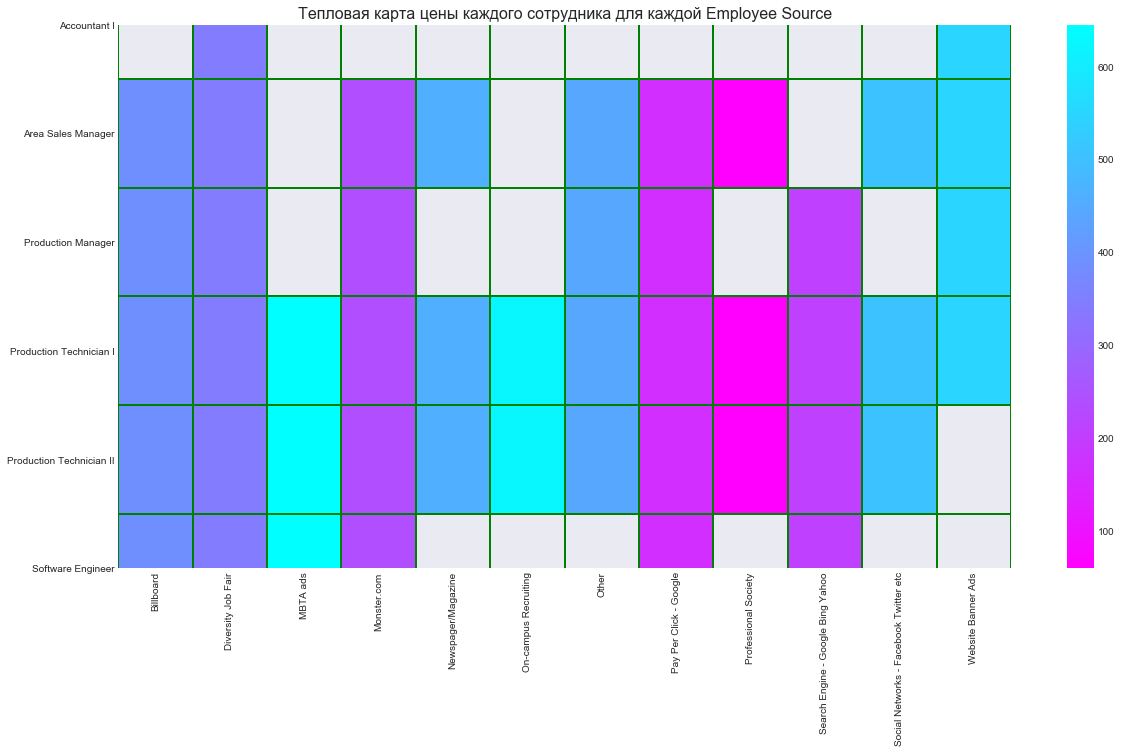

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(money_for_one_employee,cmap='cool_r',linecolor='green',linewidths=1)
plt.title("Тепловая карта цены каждого сотрудника для каждой Employee Source", fontsize=16)
plt.tick_params(axis = 'y',labelrotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

Text(163.5, 0.5, '')

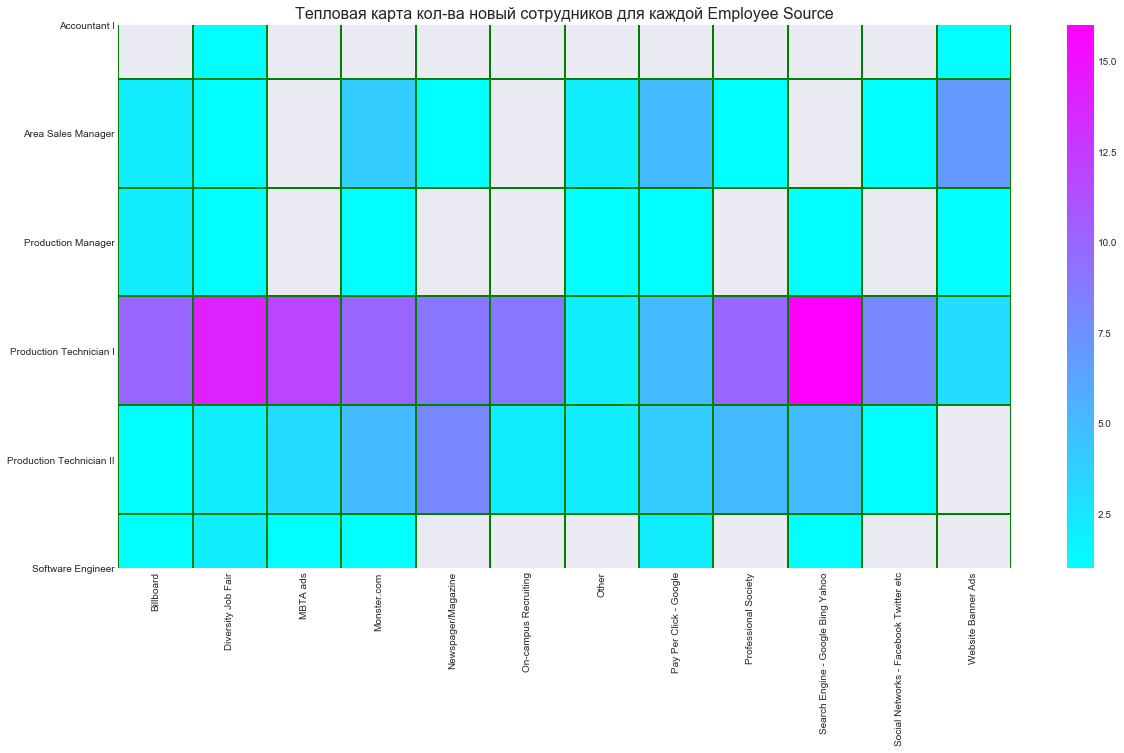

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(count_for_one_employee,cmap='cool',linecolor='green',linewidths=1)
plt.title("Тепловая карта кол-ва новый сотрудников для каждой Employee Source", fontsize=16)
plt.tick_params(axis = 'y',labelrotation=0)
plt.xlabel('')
plt.ylabel('')

**Благодаря тепловой карте мы можем легко увидить самые эффективные варианты поиска сотрудника по затратам  (Например: `Production Technician I`- *Professional Society : 60,Pay Per Click - Google : 167*) и по кол-ву найденных сотрудников (Например: `Production Technician I`	- *Professional Society : 10,Search Engine - Google Bing Yahoo : 16*).
В будущем мы можем ориентироваться на эти тепловые карты для эффективного поиска сотрудника на нужные позиции,отсекая дорогостоящие и неэффективные виды поиска.**

***
* #  Задача 2


**Проверим сколько сотрудников уходит самостоятельно,а скольких увольняют.**

In [64]:
count_cause_or_voluntarily = pd.read_sql_query('''SELECT  "Employment Status",COUNT("Employment Status") FRom hr_dataset
                                    WHERE  "Date of Termination" IS NOT NULL 
                                    GROUP BY "Employment Status"''', conn)
count_cause_or_voluntarily

,Employment Status,count
0,Voluntarily Terminated,88
1,Active,1
2,Terminated for Cause,14


**Преоблодающее большинство уходит самостоятельно,нужно рассмотреть причины увольнения более подробно.**

In [65]:
reason_count = pd.read_sql_query('''SELECT "Reason For Term",COUNT("Reason For Term" ) as count_reason  FROM hr_dataset
                                    WHERE ("Date of Termination" IS NOT NULL) AND ("Employment Status" = 'Voluntarily Terminated')
                                    GROUP BY "Reason For Term" 
                                    ORDER BY count_reason  DESC''', conn)
reason_count

,Reason For Term,count_reason
0,Another position,20
1,unhappy,14
2,more money,11
3,career change,9
4,hours,8
5,return to school,5
6,relocation out of area,5
7,retiring,4
8,military,4
9,maternity leave - did not return,3


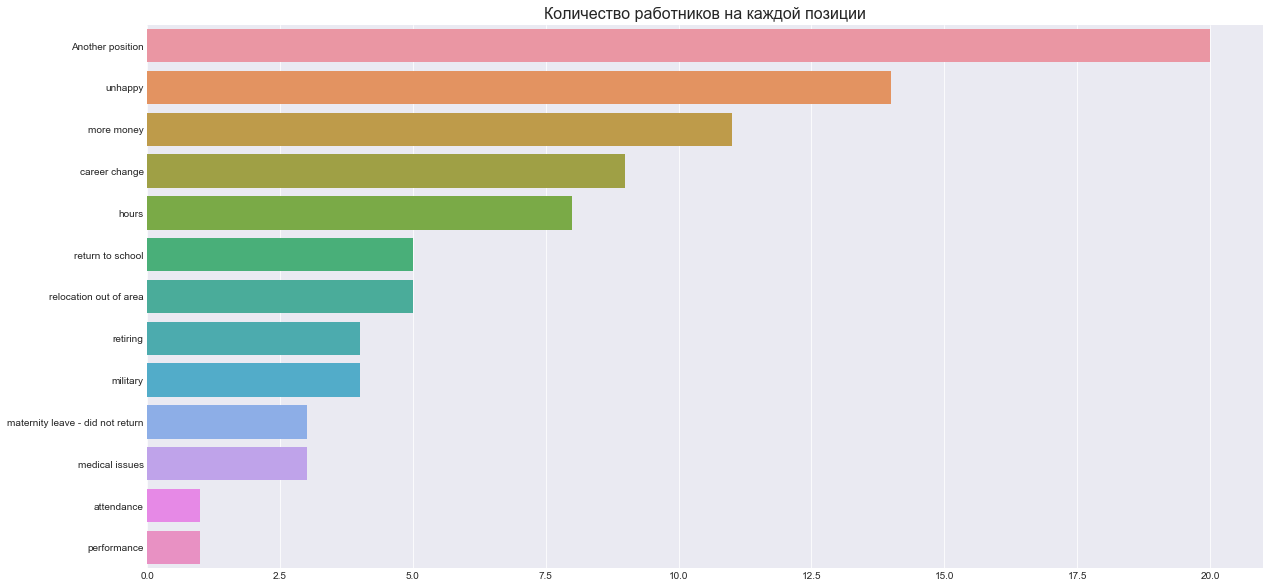

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(y = reason_count['Reason For Term'], x = reason_count.count_reason)
plt.title("Количество работников на каждой позиции", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

**Таблица с отношение причины увольнения к общему числу работников**(`relation_term_to_all`)

In [102]:
race_reason_for_term = pd.read_sql_query('''SELECT racedesc,"Reason For Term",COUNT("Reason For Term" ) as count_reason,ROUND(COUNT("Reason For Term" )/ROUND(ct,2),5) as relation_term_to_all
FROM hr_dataset
LEFT JOIN (SELECT racedesc,COUNT(racedesc) as ct
FROM hr_dataset
WHERE ("Date of Termination" IS NOT NULL) AND ("Employment Status" = 'Voluntarily Terminated')
GROUP BY racedesc) as a USING(racedesc)
WHERE ("Date of Termination" IS NOT NULL) AND ("Employment Status" = 'Voluntarily Terminated')
GROUP BY racedesc,"Reason For Term",ct
ORDER BY racedesc,count_reason  DESC''', conn,index_col = 'Reason For Term')
race_reason_for_term

,racedesc,count_reason,relation_term_to_all
Reason For Term,,,
unhappy,Asian,4,0.36364
Another position,Asian,4,0.36364
return to school,Asian,1,0.09091
career change,Asian,1,0.09091
retiring,Asian,1,0.09091
career change,Black or African American,3,0.25000
Another position,Black or African American,3,0.25000
attendance,Black or African American,1,0.08333
medical issues,Black or African American,1,0.08333


**Исследеуем `Asian,Black or African American,White` как самые широко представленные в датасете**

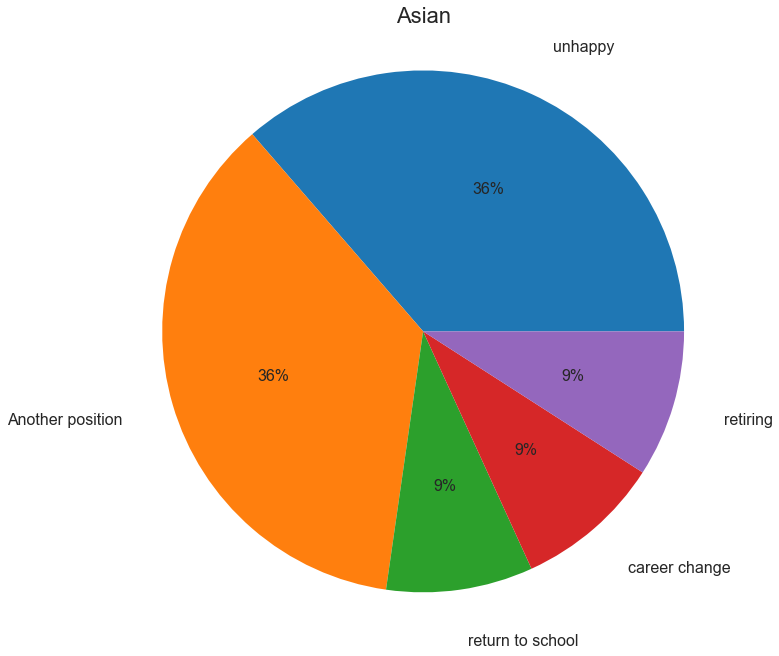

In [133]:

part = race_reason_for_term[race_reason_for_term['racedesc'] == 'Asian']['relation_term_to_all']
plot = part.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=3)
plt.title(label = 'Asian',loc='center',fontsize=22,pad=200)
plt.show()

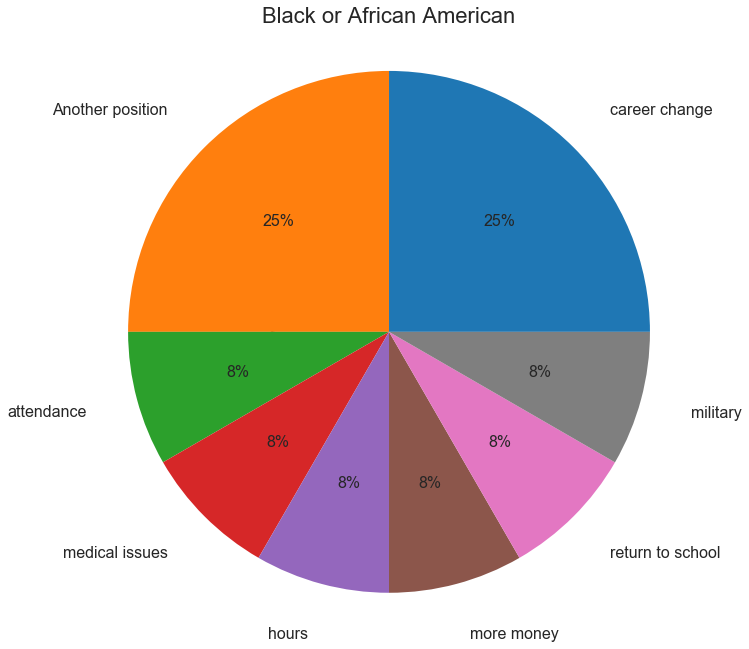

In [136]:
part = race_reason_for_term[race_reason_for_term['racedesc'] == 'Black or African American']['relation_term_to_all']
plot = part.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=3)
plt.title(label = 'Black or African American',loc='center',fontsize=22,pad=200)
plt.show()


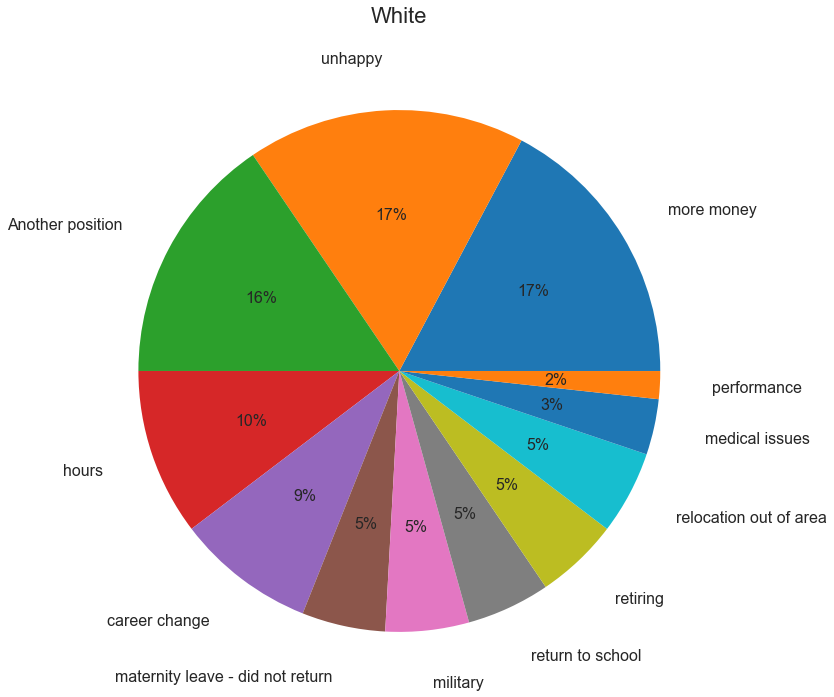

In [135]:
part = race_reason_for_term[race_reason_for_term['racedesc'] == 'White']['relation_term_to_all']
plot = part.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=3)
plt.title(label = 'White',loc='center',fontsize=22,pad=240)
plt.show()

**Как мы можем видеть на диаграмме `36% Asian`  и `17% White` сотрудников увольняются из-за того,что работа делает их несчастными или `17% White` сотрудников хочет зарабатывать больше денег.В это же время `Black` либо уходят по причинам на которые мы не можем повлиять,либо развиваются в компании.Проверим должности таких сотрудников**

In [137]:
race_reason_for_term_unhappy = pd.read_sql_query('''SELECT racedesc,position,COUNT(position)
                                            FROM hr_dataset
                                            WHERE "Reason For Term" = 'unhappy'
                                            GROUP BY racedesc,position
                                            ORDER BY COUNT(position)''', conn)
race_reason_for_term_unhappy

,racedesc,position,count
0,Asian,Production Manager,1
1,Asian,Production Technician I,1
2,Asian,Production Technician II,2
3,White,Production Technician II,4
4,White,Production Technician I,6


In [138]:
race_reason_for_term_more_money= pd.read_sql_query('''SELECT racedesc,position,COUNT(position)
                                            FROM hr_dataset
                                            WHERE "Reason For Term" = 'more money'
                                            GROUP BY racedesc,position
                                            ORDER BY COUNT(position)''', conn)
race_reason_for_term_more_money

,racedesc,position,count
0,Black or African American,Production Technician II,1
1,White,Production Technician II,3
2,White,Production Technician I,7


**Можем заметить что все эти должности связаны с производством.Возможно `Black` не задействованны в произдводстве ,и из-за этого у них столь низкий процент недовольства работой**

In [143]:
black_production_position= pd.read_sql_query('''SELECT position,COUNT(position) 
                                                FROM hr_dataset
                                                WHERE (racedesc = 'Black or African American') and (department = 'Production       ')
                                                GROUP BY position''', conn)
black_production_position

,position,count
0,Production Manager,2
1,Production Technician I,20
2,Production Technician II,9
3,Director of Operations,1


**Возможно стоит рассматривать кандидатуры `Black` в приоритете на производственные должности.**
***

***
* # Задача 3
**Составим датасет со средним количеством рабочих дней для каждой расовой группы,пола,и семейного положения(Где 1  - `женат/замужем`, 0 - `холост/не замужем`**

In [219]:
avg_days_employed= pd.read_sql_query('''SELECT CONCAT(racedesc,' ',marriedid) as race_and_marriedid,sex,COUNT(DISTINCT "Employee Name"),ROUND(AVG("Days Employed"),2) as avg_days_employed  FROM hr_dataset
                                        GROUP BY marriedid,sex,racedesc
                                        ORDER BY race_and_marriedid,AVG("Days Employed") DESC''', conn,index_col='race_and_marriedid')
avg_days_employed 

,sex,count,avg_days_employed
race_and_marriedid,,,
American Indian or Alaska Native 0,Male,1,2330.00
American Indian or Alaska Native 0,Female,2,1927.00
American Indian or Alaska Native 1,Male,1,1196.00
Asian 0,Female,12,1213.75
Asian 0,Male,7,1082.86
Asian 1,Male,6,1196.17
Asian 1,Female,9,1140.00
Black or African American 0,Female,17,1520.71
Black or African American 0,Male,19,1406.26


**Сделаем графики для мужчин и женщин.Уберем информацию с небольшой выборкой сотрудников**


In [220]:
male = avg_days_employed[(avg_days_employed['sex'] == 'Male') & (avg_days_employed['count'] > 2) ]
female =  avg_days_employed[(avg_days_employed['sex'] == 'Female') & (avg_days_employed['count'] > 2)]

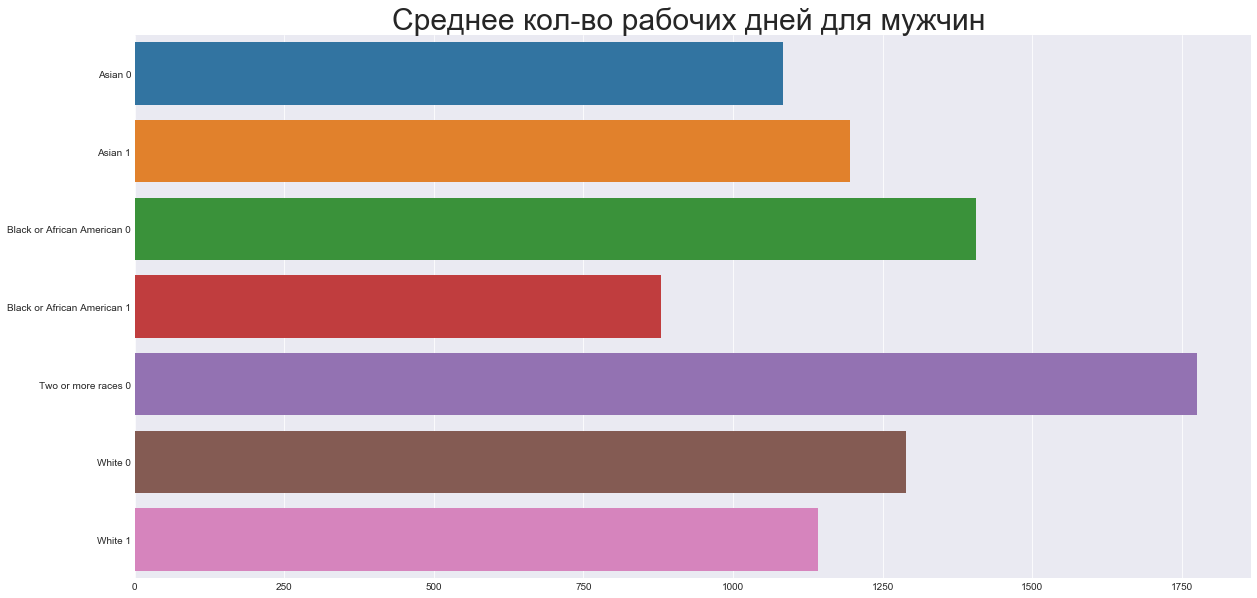

In [221]:

plt.figure(figsize=(20,10))
sns.barplot(y = male.index, x = male.avg_days_employed)
plt.title("Среднее кол-во рабочих дней для мужчин ", fontsize=30)
plt.xlabel('')
plt.ylabel('')
plt.show()

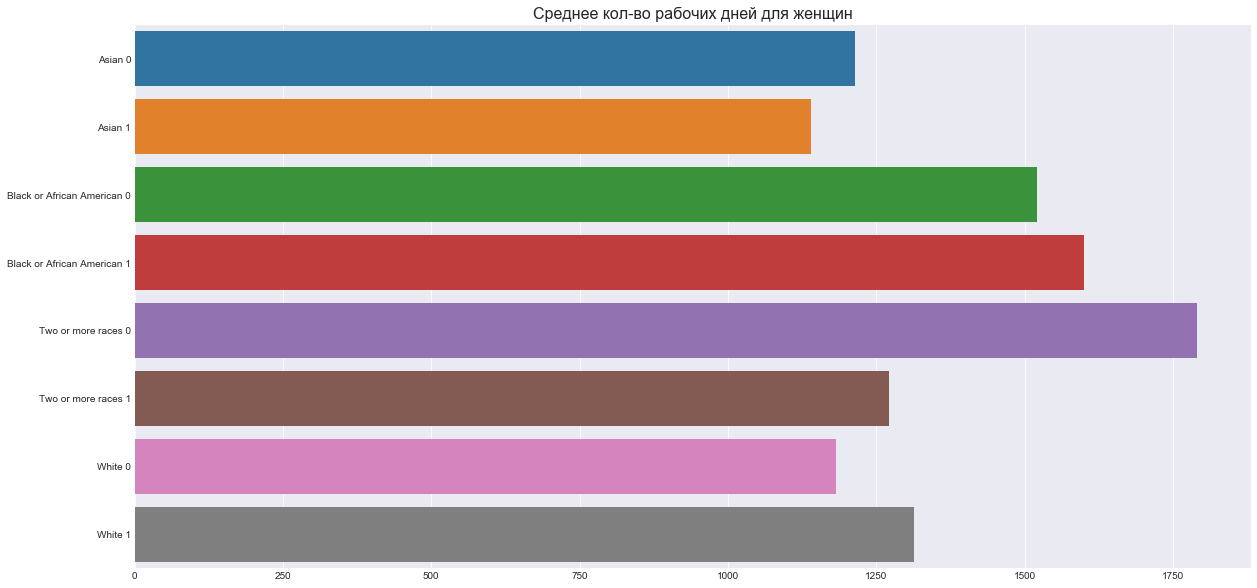

In [222]:
plt.figure(figsize=(20,10))
sns.barplot(y = female.index, x = female.avg_days_employed)
plt.title("Среднее кол-во рабочих дней для женщин", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

**Рассмотрев графики мы можем увидеть,что семейное положение сотрудников особо не влияет на продолжительность работы.За исключением:**
 * для мужчин - `Two or more races`,`Black or African American`,где неженатые работают гораздо дольше
 * для женщин - `Two or more races`,где опять же незамужние работают дольше 
